# Implementasi K-NN pada datase iris ( Tugas 3 )

In [11]:
%matplotlib inline

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

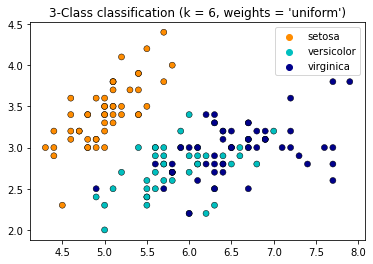

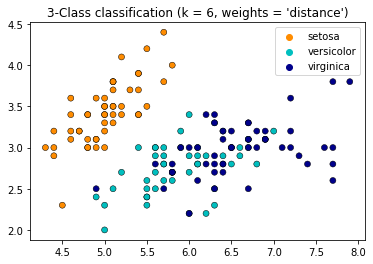

In [13]:
n_neighbors = 6

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :4]
y = iris.target

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train,y_train)

    ax = plt.subplots()
    # DecisionBoundaryDisplay.from_estimator(
    #     clf,
    #     X,
    #     cmap=cmap_light,
    #     ax=ax,
    #     response_method="predict",
    #     plot_method="pcolormesh",
    #     xlabel=iris.feature_names[0],
    #     ylabel=iris.feature_names[1],
    #     shading="auto",
    # )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

In [14]:
#show first 5 model predictions on the test data
clf.predict(X_test)[0:6]

array([2, 0, 1, 0, 0, 0])

In [15]:
#check accuracy of our model on the test data
clf.score(X_test, y_test)

0.9666666666666667